In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.simplefilter("ignore")
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("hiring.csv")

In [3]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
...,...,...,...,...
140,2,9.0,9,59000
141,5,8.0,8,56000
142,7,7.0,8,55000
143,4,6.0,7,52000


In [4]:
df.shape

(145, 4)

In [5]:
df.isnull

<bound method DataFrame.isnull of     experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0          NaN                    8.0                           9      50000
1          NaN                    8.0                           6      45000
2         five                    6.0                           7      60000
3          two                   10.0                          10      65000
4        seven                    9.0                           6      70000
..         ...                    ...                         ...        ...
140          2                    9.0                           9      59000
141          5                    8.0                           8      56000
142          7                    7.0                           8      55000
143          4                    6.0                           7      52000
144          2                    9.0                           9      59000

[145 rows x 4 columns]>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  143 non-null    object 
 1   test_score(out of 10)       144 non-null    float64
 2   interview_score(out of 10)  145 non-null    int64  
 3   salary($)                   145 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 4.7+ KB


In [7]:
df["experience"].unique()

array([nan, 'five', 'two', 'seven', 'three', 'ten', 'eleven', '2', '5',
       '3', '7', '4', '6', '1'], dtype=object)

In [8]:
df["experience"].replace({"five":5,"two":2,"seven":7,"three":3,"ten":10,"eleven":11},inplace=True)

In [9]:
df["experience"].unique()

array([nan, 5, 2, 7, 3, 10, 11, '2', '5', '3', '7', '4', '6', '1'],
      dtype=object)

In [10]:
df["experience"].fillna(0,inplace=True)
df["experience"].unique()

array([0, 5, 2, 7, 3, 10, 11, '2', '5', '3', '7', '4', '6', '1'],
      dtype=object)

In [11]:
df["experience"]=df["experience"].astype(int)

In [12]:
df.isnull().sum()

experience                    0
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [13]:
n=df[df["test_score(out of 10)"].isnull()]
n

,experience,test_score(out of 10),interview_score(out of 10),salary($)
6,10,NaN,7,72000


In [14]:
mean_value=df["test_score(out of 10)"].mean()
mean_value

7.493055555555555

In [15]:
df["test_score(out of 10)"].fillna(mean_value,inplace=True)

In [16]:
pd.set_option('display.max_columns', None)
print(df)

     experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0             0                    8.0                           9      50000
1             0                    8.0                           6      45000
2             5                    6.0                           7      60000
3             2                   10.0                          10      65000
4             7                    9.0                           6      70000
..          ...                    ...                         ...        ...
140           2                    9.0                           9      59000
141           5                    8.0                           8      56000
142           7                    7.0                           8      55000
143           4                    6.0                           7      52000
144           2                    9.0                           9      59000

[145 rows x 4 columns]


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  145 non-null    int32  
 1   test_score(out of 10)       145 non-null    float64
 2   interview_score(out of 10)  145 non-null    int64  
 3   salary($)                   145 non-null    int64  
dtypes: float64(1), int32(1), int64(2)
memory usage: 4.1 KB


In [18]:
df.shape

(145, 4)

In [19]:
df["experience"].skew()

0.3685295550900829

In [20]:
df["test_score(out of 10)"].skew()

0.0032906762708780363

In [21]:
df["interview_score(out of 10)"].skew()

-0.09154245110443236

In [22]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
...,...,...,...,...
140,2,9.0,9,59000
141,5,8.0,8,56000
142,7,7.0,8,55000
143,4,6.0,7,52000


In [23]:
df["salary($)"].skew()

1.598697582287083

In [24]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of      experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0             0                    8.0                           9      50000
1             0                    8.0                           6      45000
2             5                    6.0                           7      60000
3             2                   10.0                          10      65000
4             7                    9.0                           6      70000
..          ...                    ...                         ...        ...
140           2                    9.0                           9      59000
141           5                    8.0                           8      56000
142           7                    7.0                           8      55000
143           4                    6.0                           7      52000
144           2                    9.0                           9      59000

[145 rows x 4 column

<Axes: >

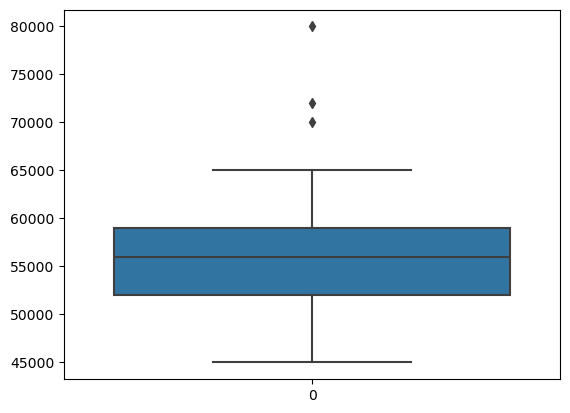

In [25]:
sns.boxplot(df["salary($)"])

<Axes: >

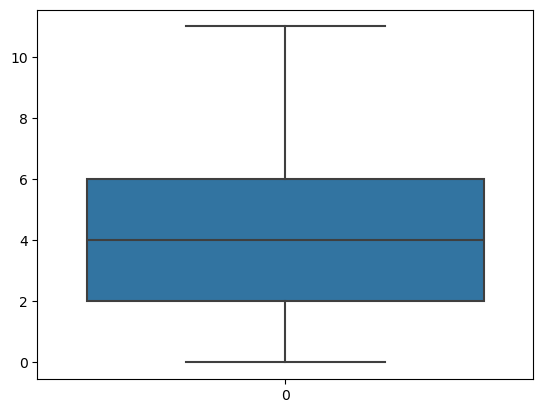

In [26]:
sns.boxplot(df["experience"])

<Axes: >

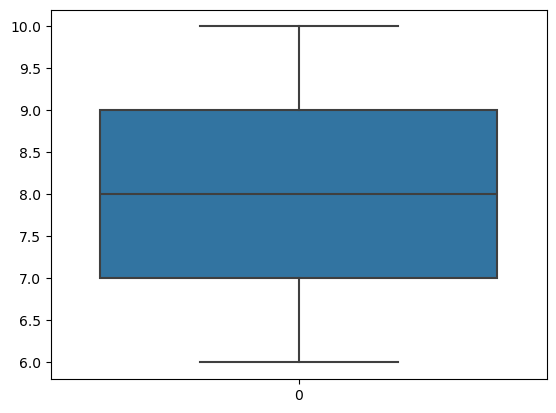

In [27]:
sns.boxplot(df["interview_score(out of 10)"])

<Axes: >

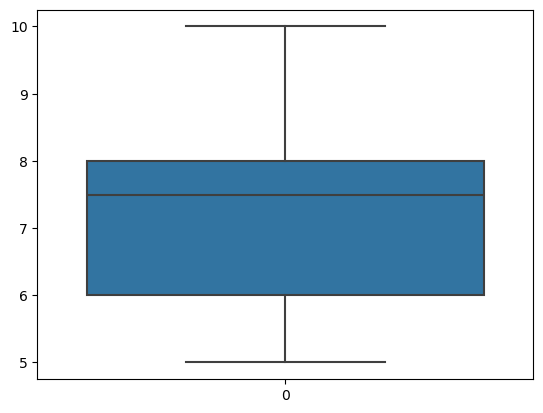

In [28]:
sns.boxplot(df["test_score(out of 10)"])

In [29]:
q1 = df['salary($)'].quantile(0.25)
q3 = df['salary($)'].quantile(0.75)
iqr = q3 - q1  # Interquartile range
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['salary($)'] < lower_bound) | (df['salary($)'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 3


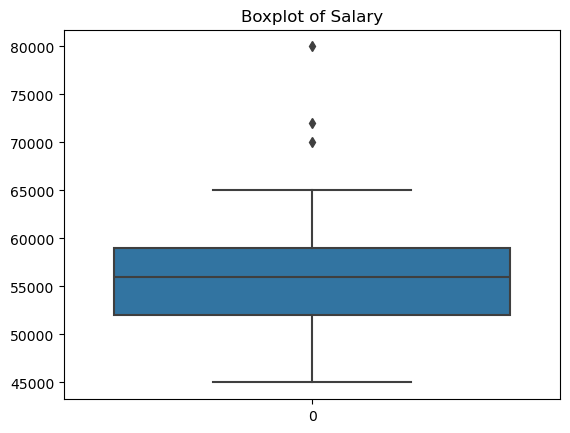

   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
4           7               9.000000                           6      70000
6          10               7.493056                           7      72000
7          11               7.000000                           8      80000


In [30]:
# Visualize the boxplot again to see the outliers
sns.boxplot(df['salary($)'])
plt.title('Boxplot of Salary')
plt.show()

# Display the outliers (those above or below the whiskers)
outliers_visible = df[df['salary($)'] > upper_bound]  # Adjust this depending on which side outliers exist
print(outliers_visible)

In [31]:
df.drop(index=[6,7],inplace=True)

In [32]:
df.head(10)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
8,2,8.0,9,50000
9,5,7.0,8,55000
10,3,6.0,7,45000
11,7,9.0,9,65000


In [33]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
...,...,...,...,...
140,2,9.0,9,59000
141,5,8.0,8,56000
142,7,7.0,8,55000
143,4,6.0,7,52000


In [34]:
df.shape

(143, 4)

In [35]:
df.corr()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
experience,1.000000,-0.444787,-0.450446,-0.137613
test_score(out of 10),-0.444787,1.000000,0.831308,0.818151
interview_score(out of 10),-0.450446,0.831308,1.000000,0.718352
salary($),-0.137613,0.818151,0.718352,1.000000


In [36]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
...,...,...,...,...
140,2,9.0,9,59000
141,5,8.0,8,56000
142,7,7.0,8,55000
143,4,6.0,7,52000


In [37]:
x = df.drop("salary($)",axis=1)
y = df["salary($)"]

In [38]:
train_r2 = []
cv = []
test_r2 = []

for i in range(0,100):
    
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=i)
    
    from sklearn.linear_model import LinearRegression
    model=LinearRegression()
    model.fit(x_train,y_train)

    ypred_train = model.predict(x_train)
    ypred_test = model.predict(x_test)
    
    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(model,x_train,y_train,cv=5).mean())
    
    from sklearn.metrics import r2_score
    train_r2.append(r2_score(y_train,ypred_train))
    test_r2.append(r2_score(y_test,ypred_test))
    
em =pd.DataFrame({"train_r2":train_r2,"cv":cv,"test_r2":test_r2})

# for best random state number...just check train == cv or not

gm = em[(abs(em["test_r2"]-em["cv"])<=0.05)]
# it retains rows where the difference between training R-squared and CV R-squared is within 0.05.
# Difference b/w train and cv must be less than 0.05 itself

rs=gm[gm["test_r2"]==gm["test_r2"].max()].index.tolist()[0]

pd.set_option("display.max_rows",None)
rs
# best random state number is  [ rs = 77 ] will come or 54 as per our code

55

In [40]:
import warnings
warnings.simplefilter("ignore")

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
#from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Initialize models with random_state if applicable
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "K Neighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
    # Uncomment if using LGBMRegressor or CatBoostRegressor
    # "LightGBM": LGBMRegressor(random_state=42),
    # "CatBoost": CatBoostRegressor(random_state=42)
}

# Metrics dictionaries
train_r2 = {}
test_r2 = {}
cv_score_train = {}
train_rmse = {}
test_rmse = {}
train_mae = {}
test_mae = {}
train_mse = {}
test_mse = {}
train_r2_pca = {}
test_r2_pca = {}
cv_score_train_pca = {}
train_rmse_pca = {}
test_rmse_pca = {}
train_mae_pca = {}
test_mae_pca = {}
train_mse_pca = {}
test_mse_pca = {}
best_params = {}
best_random_state = {}

# Iterate over each model
for name, model in models.items():
    train_r2_temp = []
    test_r2_temp = []
    cv_temp = []
    train_r2_temp_pca = []
    test_r2_temp_pca = []
    cv_temp_pca = []

    # For finding the best random state, it’s generally better to use scaled data.
    for i in range(0, 100):
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=i)
        scaler = MinMaxScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)

        model.fit(x_train_scaled, y_train)
        ypred_train = model.predict(x_train_scaled)
        ypred_test = model.predict(x_test_scaled)

        cv_temp.append(cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='r2').mean())
        train_r2_temp.append(r2_score(y_train, ypred_train))
        test_r2_temp.append(r2_score(y_test, ypred_test))

    em = pd.DataFrame({"train_r2": train_r2_temp, "cv": cv_temp, "test_r2": test_r2_temp})
    gm = em[(abs(em["test_r2"] - em["cv"]) <= 0.05)]
    rs = gm[gm["test_r2"] == gm["test_r2"].max()].index.tolist()[0]
    best_random_state[name] = rs

    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=rs)
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Best params (for RandomizedSearchCV applied models)
    if isinstance(model, (KNeighborsRegressor, SVR, DecisionTreeRegressor, RandomForestRegressor,
                          GradientBoostingRegressor, AdaBoostRegressor)):
        param_grid = {}
        if isinstance(model, KNeighborsRegressor):
            param_grid = {"n_neighbors": list(range(1, 50))}
        elif isinstance(model, SVR):
            param_grid = {"C": [0.1, 0.01, 1, 10, 100], "kernel": ["linear", "rbf", "sigmoid", "poly"]}
        elif isinstance(model, DecisionTreeRegressor):
            param_grid = {"criterion": ["mse", "friedman_mse"], "max_depth": list(range(1, 20))}
        elif isinstance(model, RandomForestRegressor):
            param_grid = {"n_estimators": list(range(1, 20))}
        elif isinstance(model, GradientBoostingRegressor):
            param_grid = {"n_estimators": list(range(50, 201, 50)), "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
        elif isinstance(model, AdaBoostRegressor):
            param_grid = {"n_estimators": list(range(1, 21))}
        # Uncomment if using LGBMRegressor or CatBoostRegressor
        #elif isinstance(model, LGBMRegressor):
        #    param_grid = {"n_estimators": list(range(50, 201, 50)), "num_leaves": list(range(20, 150, 30))}
        #elif isinstance(model, CatBoostRegressor):
        #    param_grid = {"iterations": [100, 200, 300], "depth": [4, 6, 10]}

        random_search = RandomizedSearchCV(model, param_distributions=param_grid, scoring="r2", cv=5, n_iter=10, random_state=rs)
        random_search.fit(x_train_scaled, y_train)
        best_params[name] = random_search.best_params_
        model = random_search.best_estimator_

    # Set random_state for models that require it
    if hasattr(model, 'random_state'):
        model.random_state = best_random_state[name]

    model.fit(x_train_scaled, y_train)
    ypred_train = model.predict(x_train_scaled)
    ypred_test = model.predict(x_test_scaled)
    train_r2[name] = r2_score(y_train, ypred_train)
    test_r2[name] = r2_score(y_test, ypred_test)
    cv_score_train[name] = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='r2').mean()
    train_rmse[name] = np.sqrt(mean_squared_error(y_train, ypred_train))
    test_rmse[name] = np.sqrt(mean_squared_error(y_test, ypred_test))
    train_mae[name] = mean_absolute_error(y_train, ypred_train)
    test_mae[name] = mean_absolute_error(y_test, ypred_test)
    train_mse[name] = mean_squared_error(y_train, ypred_train)
    test_mse[name] = mean_squared_error(y_test, ypred_test)

    pca = PCA(n_components=0.95)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)
    model.fit(x_train_pca, y_train)
    ypred_train_pca = model.predict(x_train_pca)
    ypred_test_pca = model.predict(x_test_pca)
    train_r2_pca[name] = r2_score(y_train, ypred_train_pca)
    test_r2_pca[name] = r2_score(y_test, ypred_test_pca)
    cv_score_train_pca[name] = cross_val_score(model, x_train_pca, y_train, cv=5, scoring='r2').mean()
    train_rmse_pca[name] = np.sqrt(mean_squared_error(y_train, ypred_train_pca))
    test_rmse_pca[name] = np.sqrt(mean_squared_error(y_test, ypred_test_pca))
    train_mae_pca[name] = mean_absolute_error(y_train, ypred_train_pca)
    test_mae_pca[name] = mean_absolute_error(y_test, ypred_test_pca)
    train_mse_pca[name] = mean_squared_error(y_train, ypred_train_pca)
    test_mse_pca[name] = mean_squared_error(y_test, ypred_test_pca)

# Output results
print("*" * 50)
print("REGRESSION MODELS")
print("*" * 50)
print("")

for name in models.keys():
    print(f"Model: {name}")
    print(f"Best Params: {best_params.get(name, 'N/A')}")
    print(f"Best Random State: {best_random_state[name]} " )
    print(f"Without PCA:")
    print(f"Train R2: {train_r2[name]}")
    print(f"Test R2: {test_r2[name]}")
    print(f"CV Score (Train): {cv_score_train[name]}")
    print(f"Train RMSE: {train_rmse[name]}")
    print(f"Test RMSE: {test_rmse[name]}")
    print(f"Train MAE: {train_mae[name]}")
    print(f"Test MAE: {test_mae[name]}")
    print(f"Train MSE: {train_mse[name]}")
    print(f"Test MSE: {test_mse[name]}")
    print("-" * 25)
    print(f"With PCA:")
    print(f"Train R2: {train_r2_pca[name]}")
    print(f"Test R2: {test_r2_pca[name]}")
    print(f"CV Score (Train): {cv_score_train_pca[name]}")
    print(f"Train RMSE: {train_rmse_pca[name]}")
    print(f"Test RMSE: {test_rmse_pca[name]}")
    print(f"Train MAE: {train_mae_pca[name]}")
    print(f"Test MAE: {test_mae_pca[name]}")
    print(f"Train MSE: {train_mse_pca[name]}")
    print(f"Test MSE: {test_mse_pca[name]}")
    print("_" * 50)


**************************************************
REGRESSION MODELS
**************************************************

Model: Linear Regression
Best Params: N/A
Best Random State: 55 
Without PCA:
Train R2: 0.7189198557462941
Test R2: 0.7403097764750132
CV Score (Train): 0.7197277190067417
Train RMSE: 1851.5808279649875
Test RMSE: 2280.075671832541
Train MAE: 1058.1041120210443
Test MAE: 1220.799859584433
Train MSE: 3428351.562487509
Test MSE: 5198745.069282614
-------------------------
With PCA:
Train R2: 0.7032010308499074
Test R2: 0.8304984497408127
CV Score (Train): 0.7055872340618455
Train RMSE: 1902.6494745077496
Test RMSE: 1842.079196760752
Train MAE: 1092.1318083346368
Test MAE: 1215.1412526607285
Train MSE: 3620075.022844616
Test MSE: 3393255.7671387373
__________________________________________________
Model: Ridge Regression
Best Params: N/A
Best Random State: 55 
Without PCA:
Train R2: 0.7030653153659261
Test R2: 0.7512041703023149
CV Score (Train): 0.7144436614295053
Tra

In [41]:
import warnings
warnings.simplefilter("ignore")

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Initialize models with random_state and regularization if applicable
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),  # Added regularization with alpha
    "Lasso Regression": Lasso(alpha=0.1),  # Lasso with regularization term
    "SVR": SVR(C=1.0, kernel='rbf'),  # Support vector regression with regularization
    "Decision Tree": DecisionTreeRegressor(max_depth=5),  # Limit tree depth
    "Random Forest": RandomForestRegressor(max_depth=10, n_estimators=100),  # Limiting depth and trees
    "K Neighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, early_stopping_rounds=10),  # Early stopping for XGBoost
    "AdaBoost": AdaBoostRegressor(n_estimators=50),  # Limited n_estimators to prevent overfitting
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)  # Gradient boosting regularized
}

# Metrics dictionaries
train_r2 = {}
test_r2 = {}
cv_score_train = {}
train_rmse = {}
test_rmse = {}
train_mae = {}
test_mae = {}
train_mse = {}
test_mse = {}
train_r2_pca = {}
test_r2_pca = {}
cv_score_train_pca = {}
train_rmse_pca = {}
test_rmse_pca = {}
train_mae_pca = {}
test_mae_pca = {}
train_mse_pca = {}
test_mse_pca = {}
best_params = {}
best_random_state = {}

# Iterate over each model
for name, model in models.items():
    train_r2_temp = []
    test_r2_temp = []
    cv_temp = []
    train_r2_temp_pca = []
    test_r2_temp_pca = []
    cv_temp_pca = []

    # Find the best random state by iterating over random states
    for i in range(0, 100):
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=i)
        scaler = MinMaxScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)

        model.fit(x_train_scaled, y_train)
        ypred_train = model.predict(x_train_scaled)
        ypred_test = model.predict(x_test_scaled)

        cv_temp.append(cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='r2').mean())
        train_r2_temp.append(r2_score(y_train, ypred_train))
        test_r2_temp.append(r2_score(y_test, ypred_test))

    em = pd.DataFrame({"train_r2": train_r2_temp, "cv": cv_temp, "test_r2": test_r2_temp})
    gm = em[(abs(em["test_r2"] - em["cv"]) <= 0.05)]
    rs = gm[gm["test_r2"] == gm["test_r2"].max()].index.tolist()[0]
    best_random_state[name] = rs

    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=rs)
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Best params (for RandomizedSearchCV applied models)
    if isinstance(model, (KNeighborsRegressor, SVR, DecisionTreeRegressor, RandomForestRegressor,
                          GradientBoostingRegressor, AdaBoostRegressor)):
        param_grid = {}
        if isinstance(model, KNeighborsRegressor):
            param_grid = {"n_neighbors": list(range(1, 50))}
        elif isinstance(model, SVR):
            param_grid = {"C": [0.1, 0.01, 1, 10, 100], "kernel": ["linear", "rbf", "sigmoid", "poly"]}
        elif isinstance(model, DecisionTreeRegressor):
            param_grid = {"criterion": ["mse", "friedman_mse"], "max_depth": list(range(1, 20))}
        elif isinstance(model, RandomForestRegressor):
            param_grid = {"n_estimators": list(range(1, 20)), "max_depth": list(range(1, 20))}
        elif isinstance(model, GradientBoostingRegressor):
            param_grid = {"n_estimators": list(range(50, 201, 50)), "learning_rate":[0.1,0.2,0.3,0.4,0.5]}
        elif isinstance(model, AdaBoostRegressor):
            param_grid = {"n_estimators": list(range(1, 21))}

        random_search = RandomizedSearchCV(model, param_distributions=param_grid, scoring="r2", cv=5, n_iter=10, random_state=rs)
        random_search.fit(x_train_scaled, y_train)
        best_params[name] = random_search.best_params_
        model = random_search.best_estimator_

    # Set random_state for models that require it
    if hasattr(model, 'random_state'):
        model.random_state = best_random_state[name]

    model.fit(x_train_scaled, y_train)
    ypred_train = model.predict(x_train_scaled)
    ypred_test = model.predict(x_test_scaled)
    train_r2[name] = r2_score(y_train, ypred_train)
    test_r2[name] = r2_score(y_test, ypred_test)
    cv_score_train[name] = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='r2').mean()
    train_rmse[name] = np.sqrt(mean_squared_error(y_train, ypred_train))
    test_rmse[name] = np.sqrt(mean_squared_error(y_test, ypred_test))
    train_mae[name] = mean_absolute_error(y_train, ypred_train)
    test_mae[name] = mean_absolute_error(y_test, ypred_test)
    train_mse[name] = mean_squared_error(y_train, ypred_train)
    test_mse[name] = mean_squared_error(y_test, ypred_test)

    pca = PCA(n_components=0.95)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)
    model.fit(x_train_pca, y_train)
    ypred_train_pca = model.predict(x_train_pca)
    ypred_test_pca = model.predict(x_test_pca)
    train_r2_pca[name] = r2_score(y_train, ypred_train_pca)
    test_r2_pca[name] = r2_score(y_test, ypred_test_pca)
    cv_score_train_pca[name] = cross_val_score(model, x_train_pca, y_train, cv=5, scoring='r2').mean()
    train_rmse_pca[name] = np.sqrt(mean_squared_error(y_train, ypred_train_pca))
    test_rmse_pca[name] = np.sqrt(mean_squared_error(y_test, ypred_test_pca))
    train_mae_pca[name] = mean_absolute_error(y_train, ypred_train_pca)
    test_mae_pca[name] = mean_absolute_error(y_test, ypred_test_pca)
    train_mse_pca[name] = mean_squared_error(y_train, ypred_train_pca)
    test_mse_pca[name] = mean_squared_error(y_test, ypred_test_pca)

# Output results
print("*" * 50)
print("REGRESSION MODELS")
print("*" * 50)
print("")

for name in models.keys():
    print(f"Model: {name}")
    print(f"Best Params: {best_params.get(name, 'N/A')}")
    print(f"Best Random State: {best_random_state[name]} " )
    print(f"Without PCA:")
    print(f"Train R2: {train_r2[name]}")
    print(f"Test R2: {test_r2[name]}")
    print(f"CV Score (Train): {cv_score_train[name]}")
    print(f"Train RMSE: {train_rmse[name]}")
    print(f"Test RMSE: {test_rmse[name]}")
    print(f"Train MAE: {train_mae[name]}")
    print(f"Test MAE: {test_mae[name]}")
    print(f"Train MSE: {train_mse[name]}")
    print(f"Test MSE: {test_mse[name]}")
    print("-" * 25)
    print(f"With PCA:")
    print(f"Train R2: {train_r2_pca[name]}")
    print(f"Test R2: {test_r2_pca[name]}")
    print(f"CV Score (Train): {cv_score_train_pca[name]}")
    print(f"Train RMSE: {train_rmse_pca[name]}")
    print(f"Test RMSE: {test_rmse_pca[name]}")
    print(f"Train MAE: {train_mae_pca[name]}")
    print(f"Test MAE: {test_mae_pca[name]}")
    print(f"Train MSE: {train_mse_pca[name]}")
    print(f"Test MSE: {test_mse_pca[name]}")
    print("_" * 50)


ValueError: Must have at least 1 validation dataset for early stopping.